In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import netCDF4 as nc4
import xarray as xr
import scipy as sp
from scipy import stats
from cdo import *
cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')
import iris
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import cmocean

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
tas_p1_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_560101-580012.nc')['tas'].mean(dim='time')
tas_p2_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p2f1_gn_560101-580012.nc')['tas'].mean(dim='time')

pr_p1_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_piControl_r1i1p1f1_gn_560101-580012.nc')['pr'].mean(dim='time')
pr_p2_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_piControl_r1i1p2f1_gn_560101-580012.nc')['pr'].mean(dim='time')

In [3]:
tauuo_p1_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/tauuo/gn/v20190429/tauuo_Omon_CanESM5_piControl_r1i1p1f1_gn_560101-580012.nc')['tauuo'].mean(dim='time')
tauuo_p2_pic = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/tauuo/gn/v20190429/tauuo_Omon_CanESM5_piControl_r1i1p2f1_gn_560101-580012.nc')['tauuo'].mean(dim='time')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
wo_p1_pic = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p1f1/Omon/wo/gn/v20190429/wo_Omon_CanESM5_piControl_r1i1p1f1_gn_56*').isel(lev=10)['wo'].load()
wo_p2_pic = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Omon/wo/gn/v20190429/wo_Omon_CanESM5_piControl_r1i1p2f1_gn_56*').isel(lev=10)['wo'].load()

In [5]:
wo_p1_pic = wo_p1_pic.mean(dim='time')
wo_p2_pic = wo_p2_pic.mean(dim='time')
wo_diff = (wo_p1_pic - wo_p2_pic)

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
sftlf= xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/fx/sftlf/gn/v20190429/sftlf_fx_CanESM5_piControl_r1i1p2f1_gn.nc')['sftlf']
mesh_mask = xr.open_dataset('processed_data/nemo_mesh_mask.nc')
sftof = mesh_mask['tmask'][0,0,...]
sftof=sftof[0:291,1:361]

In [7]:
def layout():
    fig = plt.figure(figsize=(12, 8), constrained_layout=False)
    grid = fig.add_gridspec(2, 5, wspace=0.25, hspace=0.1, width_ratios=[0.05,1,1,1,0.05])
    
    
def inset(axmain, ocean=True):
    axins2 = zoomed_inset_axes(axmain, 3, loc=2)  # zoom = 6
    # sub region of the original image
    if ocean:
        x1, x2, y1, y2 = 20, 50, 45, 80
    else:
        x1, x2, y1, y2 = 100, 130, -70, -50
        
    axins2.set_xlim(x1, x2)
    axins2.set_ylim(y1, y2)
    # fix the number of ticks on the inset axes
    axins2.yaxis.get_major_locator().set_params(nbins=7)
    axins2.xaxis.get_major_locator().set_params(nbins=7)

    plt.setp(axins2.get_xticklabels(), visible=False)
    plt.setp(axins2.get_yticklabels(), visible=False)

    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    mark_inset(axmain, axins2, loc1=2, loc2=4, fc="none", ec="0.5")
    return axins2

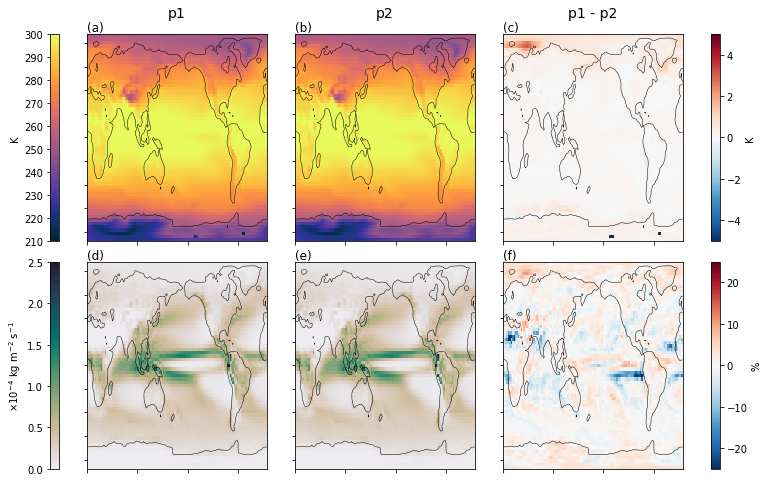

In [8]:
fig = plt.figure(figsize=(12, 8), constrained_layout=False)
grid = fig.add_gridspec(2, 5, wspace=0.25, hspace=0.1, width_ratios=[0.05,1,1,1,0.05])

cmap=cmocean.cm.thermal
vmin=210
vmax=300
axtl =  plt.subplot(grid[0, 1])
axtlc =  plt.subplot(grid[0, 0])
axtm =  plt.subplot(grid[0, 2])
axtr =  plt.subplot(grid[0, 3], sharey=axtl)
axtrc =  plt.subplot(grid[0, 4])

lon = tas_p1_pic['lon']
lat = tas_p1_pic['lat']

cob = axtl.pcolormesh(lon, lat, tas_p1_pic,  vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
plt.colorbar(cob, cax=axtlc, label='K')
axtlc.yaxis.set_ticks_position('left')
axtlc.yaxis.set_label_position('left')

#axins2 = inset(axtl, ocean=False)
#axins2.pcolormesh(lon, lat, tas_p1_pic,  vmin=vmin, vmax=vmax, cmap=cmap)
axtl.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

axtm.pcolormesh(lon, lat, tas_p2_pic,  vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
#axins2 = inset(axtm, ocean=False)
#axins2.pcolormesh(lon, lat, tas_p2_pic,  vmin=vmin, vmax=vmax, cmap=cmap)
axtm.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

cob=axtr.pcolormesh(lon, lat, tas_p1_pic - tas_p2_pic, cmap='RdBu_r', vmin=-5, vmax=5, rasterized=True)
plt.colorbar(cob, cax=axtrc, label='K')
#axins2 = inset(axtr, ocean=False)
#axins2.pcolormesh(lon, lat, tas_p1_pic - tas_p2_pic, cmap='RdBu_r', vmin=-5, vmax=5)
axtr.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

title_fontsize=14
axtl.text(0.5, 1.1, 'p1', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtl.transAxes)
axtm.text(0.5, 1.1, 'p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtm.transAxes)
axtr.text(0.5, 1.1, 'p1 - p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtr.transAxes)

labs=['(a)', '(b)', '(c)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)


for ax in [axtl, axtm, axtr]:
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

cmap=cmocean.cm.rain
vmin=0
vmax=2.5

axtl =  plt.subplot(grid[1, 1])
axtlc =  plt.subplot(grid[1, 0])
axtm =  plt.subplot(grid[1, 2])
axtr =  plt.subplot(grid[1, 3], sharey=axtl)
axtrc =  plt.subplot(grid[1, 4])

cob=axtl.pcolormesh(lon, lat, pr_p1_pic*1e4, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
plt.colorbar(cob, cax=axtlc, label=r'$\times 10^{-4}$ kg m$^{-2}$ s$^{-1}$')
axtlc.yaxis.set_ticks_position('left')
axtlc.yaxis.set_label_position('left')

#axins2 = inset(axtl, ocean=False)
#axins2.pcolormesh(lon, lat, pr_p1_pic, vmin=vmin, vmax=vmax, cmap=cmap)
axtl.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

axtm.pcolormesh(lon, lat, pr_p2_pic*1e4, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtm.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

cob=axtr.pcolormesh(lon, lat, (pr_p1_pic - pr_p2_pic)/abs(pr_p1_pic)*100, cmap='RdBu_r', vmin=-25, vmax=25, rasterized=True)
plt.colorbar(cob, cax=axtrc, label='%')
#axins2 = inset(axtr, ocean=False)
#axins2.pcolormesh(lon, lat, pr_p1_pic- pr_p2_pic, cmap='RdBu_r')
axtr.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

labs=['(d)', '(e)', '(f)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

    
plt.savefig('plots/fig-E1_p1_vs_p2_clim-maps-atmos.png', bbox_inches='tight')
plt.savefig('plots/fig-E1_p1_vs_p2_clim-maps-atmos.pdf', bbox_inches='tight')

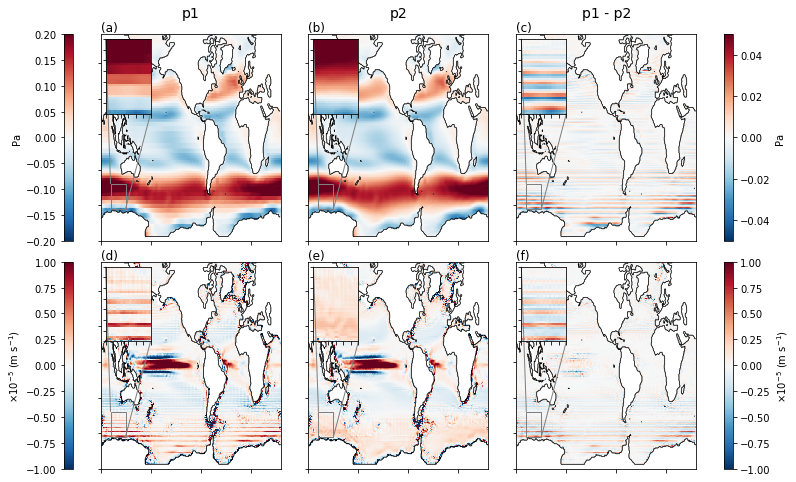

In [15]:
fig = plt.figure(figsize=(12, 8), constrained_layout=False)
grid = fig.add_gridspec(2, 5, wspace=0.25, hspace=0.1, width_ratios=[0.05,1,1,1,0.05])

#cmap=mpl.cm.RdBu_r
#cmap.set_bad(cfeature.COLORS['land'])
#cmap=mpl.cm.viridis
#cmap.set_bad(cfeature.COLORS['land'])
vmin=-0.2
vmax=0.2
cmap='RdBu_r'

axtl =  plt.subplot(grid[0, 1])
axtm =  plt.subplot(grid[0, 2], sharey=axtl)
axtr =  plt.subplot(grid[0, 3], sharey=axtl)
axtlc =  plt.subplot(grid[0, 0])
axtrc =  plt.subplot(grid[0, 4])

cob=axtl.pcolormesh(tauuo_p1_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axins2 = inset(axtl)
axins2.pcolormesh(tauuo_p1_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtl.contour(sftof, levels=1, colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtlc, label='Pa')
axtlc.yaxis.set_ticks_position('left')
axtlc.yaxis.set_label_position('left')

axtm.pcolormesh(tauuo_p2_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axins2 = inset(axtm)
axins2.pcolormesh(tauuo_p2_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtm.contour(sftof, levels=1, colors='k', linewidths=0.5)

vmin=-0.05
vmax=0.05

cob=axtr.pcolormesh(tauuo_p1_pic - tauuo_p2_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)

plt.colorbar(cob, cax=axtrc, label='Pa')
axins2 = inset(axtr)
axins2.pcolormesh(tauuo_p1_pic - tauuo_p2_pic, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtr.contour(sftof, levels=1, colors='k', linewidths=0.5)

title_fontsize=14
axtl.text(0.5, 1.1, 'p1', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtl.transAxes)
axtm.text(0.5, 1.1, 'p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtm.transAxes)
axtr.text(0.5, 1.1, 'p1 - p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtr.transAxes)

labs=['(a)', '(b)', '(c)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

axtl =  plt.subplot(grid[1, 1])
axtm =  plt.subplot(grid[1, 2], sharey=axtl)
axtr =  plt.subplot(grid[1, 3], sharey=axtl)
axtlc =  plt.subplot(grid[1, 0])
axtrc2 =  plt.subplot(grid[1, 4])

vmin=-1
vmax=1
cmap='RdBu_r'
cob=axtl.pcolormesh(wo_p1_pic*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axins2 = inset(axtl)
axins2.pcolormesh(wo_p1_pic*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtl.contour(sftof, levels=1, colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtlc, label=r'$\times 10^{-5}$ (m s$^{-1}$)')
axtlc.yaxis.set_ticks_position('left')
axtlc.yaxis.set_label_position('left')

axtm.pcolormesh(wo_p2_pic*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axins2 = inset(axtm)
axins2.pcolormesh(wo_p2_pic*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtm.contour(sftof, levels=1, colors='k', linewidths=0.5)

cob=axtr.pcolormesh(wo_diff*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axins2 = inset(axtr)
axins2.pcolormesh(wo_diff*1e5, vmin=vmin, vmax=vmax, cmap=cmap, rasterized=True)
axtr.contour(sftof, levels=1, colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtrc2, label=r'$\times 10^{-5}$ (m s$^{-1}$)')

labs=['(d)', '(e)', '(f)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

    
plt.savefig('plots/fig-E2_p1_vs_p2_clim-maps-ocn.png', bbox_inches='tight')
plt.savefig('plots/fig-E2_p1_vs_p2_clim-maps-ocn.pdf', bbox_inches='tight')

In [10]:
tas_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['tas']
tas_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_1pctCO2_r1i1p2f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['tas']

pr_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['pr']
pr_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p2f1/Amon/pr/gn/v20190429/pr_Amon_CanESM5_1pctCO2_r1i1p2f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['pr']

tauuo_p1 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Omon/tauuo/gn/v20190429/tauuo_Omon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['tauuo']
tauuo_p2 = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p2f1/Omon/tauuo/gn/v20190429/tauuo_Omon_CanESM5_1pctCO2_r1i1p2f1_gn_185001-200012.nc').sel(time=slice('1911-01-01','1930-12-31')).mean(dim='time')['tauuo']

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [11]:
wo_p1 = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p1f1/Omon/wo/gn/v20190429/wo_Omon_CanESM5_1pctCO2_r1i1p1f1_gn_*').isel(lev=10)['wo'].sel(time=slice('1911-01-01','1930-12-31')).load()
wo_p2 = xr.open_mfdataset('/space/hall2/sitestore/eccc/crd/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/1pctCO2/r1i1p2f1/Omon/wo/gn/v20190429/wo_Omon_CanESM5_1pctCO2_r1i1p2f1_gn_*').isel(lev=10)['wo'].sel(time=slice('1911-01-01','1930-12-31')).load()

wo_p1 = wo_p1.mean(dim='time')
wo_p2 = wo_p2.mean(dim='time')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
tas_p1_pert = tas_p1 - tas_p1_pic
tas_p2_pert = tas_p2 - tas_p2_pic

pr_p1_pert = (pr_p1 - pr_p1_pic)/pr_p2_pic*100
pr_p2_pert = (pr_p2 - pr_p2_pic)/pr_p2_pic*100

tauuo_p1_pert = tauuo_p1 - tauuo_p1_pic
tauuo_p2_pert = tauuo_p2 - tauuo_p2_pic

wo_p1_pert = wo_p1 - wo_p1_pic
wo_p2_pert = wo_p2 - wo_p2_pic
wo_pert_diff = wo_p1_pert - wo_p2_pert

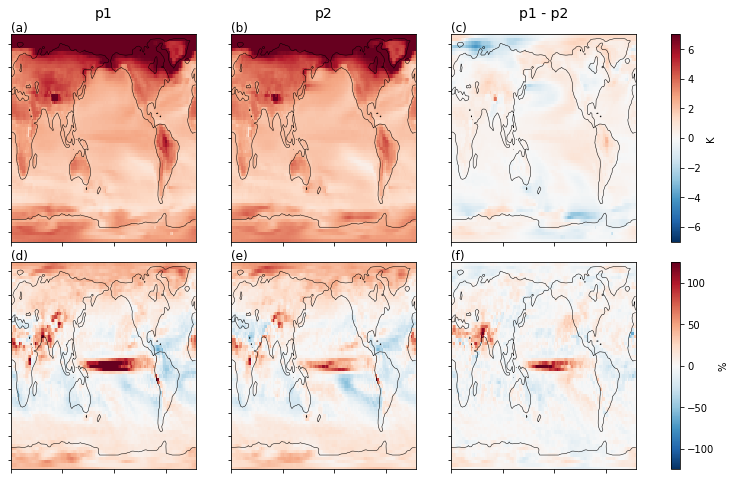

In [13]:
fig = plt.figure(figsize=(12, 8), constrained_layout=False)
grid = fig.add_gridspec(2, 4, wspace=0.25, hspace=0.1, width_ratios=[1,1,1,0.05])

axtl =  plt.subplot(grid[0, 0])
axtm =  plt.subplot(grid[0, 1], sharey=axtl)
axtr =  plt.subplot(grid[0, 2], sharey=axtl)
axtlc =  plt.subplot(grid[0, 3])

lon = tas_p1_pic['lon']
lat = tas_p1_pic['lat']

cob=axtl.pcolormesh(lon, lat, tas_p1_pert, cmap='RdBu_r', vmin=-7, vmax=7, rasterized=True)
axtl.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtlc, label='K')

axtm.pcolormesh(lon, lat, tas_p2_pert, cmap='RdBu_r', vmin=-7, vmax=7, rasterized=True)
axtm.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

axtr.pcolormesh(lon, lat, tas_p1_pert - tas_p2_pert, cmap='RdBu_r', vmin=-5, vmax=5, rasterized=True)
axtr.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

title_fontsize=14
axtl.text(0.5, 1.1, 'p1', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtl.transAxes)
axtm.text(0.5, 1.1, 'p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtm.transAxes)
axtr.text(0.5, 1.1, 'p1 - p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtr.transAxes)

labs=['(a)', '(b)', '(c)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)
    
axtl =  plt.subplot(grid[1, 0])
axtm =  plt.subplot(grid[1, 1], sharey=axtl)
axtr =  plt.subplot(grid[1, 2], sharey=axtl)
axtrc =  plt.subplot(grid[1, 3])

vmin=-125
vmax=125
cob=axtl.pcolormesh(lon, lat, pr_p1_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axtl.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtrc, label='%')

axtm.pcolormesh(lon, lat, pr_p2_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axtm.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

axtr.pcolormesh(lon, lat, pr_p1_pert - pr_p2_pert, cmap='RdBu_r',  vmin=vmin, vmax=vmax, rasterized=True)
axtr.contour(lon, lat, sftlf, levels=[25], colors='k', linewidths=0.5)

labs=['(d)', '(e)', '(f)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

    
plt.savefig('plots/fig-E4_p1_vs_p2_pert-maps-atmos.png', bbox_inches='tight')
plt.savefig('plots/fig-E4_p1_vs_p2_pert-maps-atmos.pdf', bbox_inches='tight')

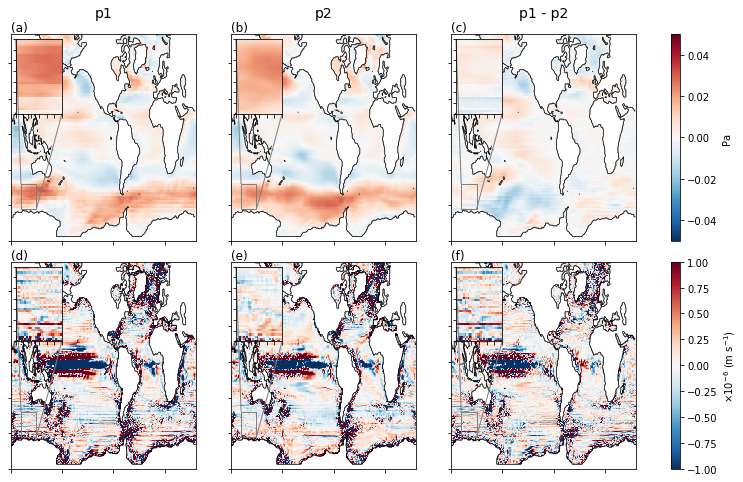

In [14]:
fig = plt.figure(figsize=(12, 8), constrained_layout=False)
grid = fig.add_gridspec(2, 4, wspace=0.25, hspace=0.1, width_ratios=[1,1,1,0.05])

axtl =  plt.subplot(grid[0, 0])
axtm =  plt.subplot(grid[0, 1], sharey=axtl)
axtr =  plt.subplot(grid[0, 2], sharey=axtl)
axtlc =  plt.subplot(grid[0, 3])

vmin=-5e-2
vmax=5e-2
cob=axtl.pcolormesh(tauuo_p1_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtl)
axins2.pcolormesh(tauuo_p1_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axtl.contour(sftof, levels=1, colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtlc, label='Pa')

axtm.pcolormesh(tauuo_p2_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtm)
axins2.pcolormesh(tauuo_p2_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axtm.contour(sftof, levels=1, colors='k', linewidths=0.5)

axtr.pcolormesh(tauuo_p1_pert - tauuo_p2_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtr)
axins2.pcolormesh(tauuo_p1_pert - tauuo_p2_pert, cmap='RdBu_r', vmin=vmin, vmax=vmax, rasterized=True)
axtr.contour(sftof, levels=1, colors='k', linewidths=0.5)

labs=['(a)', '(b)', '(c)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

    
title_fontsize=14
axtl.text(0.5, 1.1, 'p1', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtl.transAxes)
axtm.text(0.5, 1.1, 'p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtm.transAxes)
axtr.text(0.5, 1.1, 'p1 - p2', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtr.transAxes)

axtl =  plt.subplot(grid[1, 0])
axtm =  plt.subplot(grid[1, 1], sharey=axtl)
axtr =  plt.subplot(grid[1, 2], sharey=axtl)
axtrc =  plt.subplot(grid[1, 3])

vmin=-1
vmax=1
cmap='RdBu_r'

axtl.pcolormesh(wo_p1_pert*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtl)
axins2.pcolormesh(wo_p1_pert*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
axtl.contour(sftof, levels=1, colors='k', linewidths=0.5)

axtm.pcolormesh(wo_p2_pert*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtm)
axins2.pcolormesh(wo_p2_pert*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
axtm.contour(sftof, levels=1, colors='k', linewidths=0.5)

cob=axtr.pcolormesh(wo_pert_diff*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
axins2 = inset(axtr)
cob=axins2.pcolormesh(wo_pert_diff*1e6, cmap=cmap, vmin=vmin, vmax=vmax, rasterized=True)
#plt.colorbar(cob, ax=axtr, extend='both', label =r'w (m s$^{-1}$)')
axtr.contour(sftof, levels=1, colors='k', linewidths=0.5)
plt.colorbar(cob, cax=axtrc, label=r'$\times 10^{-6}$ (m s$^{-1}$)')

labs=['(d)', '(e)', '(f)']
for i, ax in enumerate([axtl, axtm, axtr]):
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.text(0, 1, labs[i], horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontsize=12)

plt.savefig('plots/fig-E5_p1_vs_p2_pert-maps-ocn.png', bbox_inches='tight')
plt.savefig('plots/fig-E5_p1_vs_p2_pert-maps-ocn.pdf', bbox_inches='tight')